In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
dataFrame = pd.read_csv("maaslar.csv")
dataFrame

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [40]:
X = dataFrame.iloc[:,1].values.reshape(-1,1)
Y = dataFrame.iloc[:,-1].values

Eldeki veri seti çok büyük olmadığı için train ve test verileri olarak parçalamayıp tüm verileri train edeceğim

# Model inşası

In [41]:
from sklearn.linear_model import LinearRegression

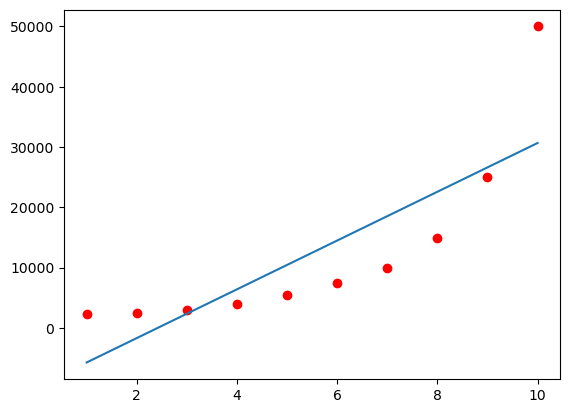

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color= "red")
plt.plot(X,lin_reg.predict(X))

Eldeki grafiğe bakınca modelle verilerin uyuşmadığını görüyoruz.Bu veriler için polinomal regresyon kullanmak daha mantıklı

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly_reg = PolynomialFeatures(degree = 2)
poly_X = poly_reg.fit_transform(X)
poly_X

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Şimdi polinomal hale gelen train verilerinden tekrar model oluşturalım

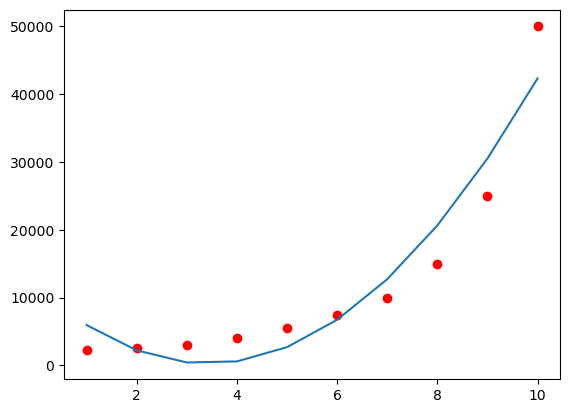

In [45]:
lin_reg2 = LinearRegression()
lin_reg2.fit(poly_X,Y)

plt.scatter(X,Y,color = "red")
plt.plot(X,lin_reg2.predict(poly_X))

İlk modele göre daha başarılı. Ama polinom derecesini 2 den 4 e çıkaralım.

In [46]:
poly_reg2 = PolynomialFeatures(degree = 4)
poly_X2 = poly_reg2.fit_transform(X)
poly_X2

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

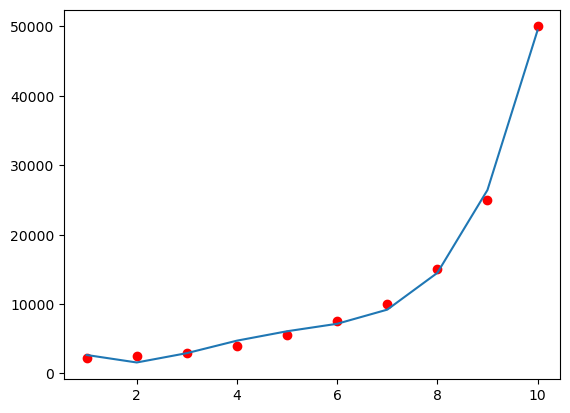

In [47]:
lin_reg_last = LinearRegression()
lin_reg_last.fit(poly_X2,Y)

plt.scatter(X,Y,color = "red")
plt.plot(X,lin_reg_last.predict(poly_X2))

In [48]:
# Bir de herhangi bir değer verirsek nasıl tahmin eder ona bakalım.
lin_reg_last.predict(poly_reg2.fit_transform([[6.6]]))

array([8146.9948718])

In [49]:
linear_model = pd.DataFrame(data=lin_reg.predict(X),columns=["Lineer Model"])
polynomial_deg2 = pd.DataFrame(data=lin_reg2.predict(poly_X),columns=["2.Derece Polinomal Model"])
polynomial_deg4 = pd.DataFrame(data=lin_reg_last.predict(poly_X2),columns=["4.Derece Polinomal Model"])
Y_df = pd.DataFrame(data=Y,columns=["Gerçek Değer"])

compare = pd.concat([linear_model,polynomial_deg2,polynomial_deg4,Y_df],axis=1)
compare


,Lineer Model,2.Derece Polinomal Model,4.Derece Polinomal Model,Gerçek Değer
0,-5722.727273,5936.363636,2667.832168,2250
1,-1678.787879,2207.575758,1587.995338,2500
2,2365.151515,421.969697,2932.109557,3000
3,6409.090909,579.545455,4731.643357,4000
4,10453.030303,2680.303030,6086.247086,5500
5,14496.969697,6724.242424,7163.752914,7500
6,18540.909091,12711.363636,9200.174825,10000
7,22584.848485,20641.666667,14499.708625,15000
8,26628.787879,30515.151515,26434.731935,25000
9,30672.727273,42331.818182,49445.804196,50000


Yukarıdaki tabloya göre en son oluşturulan lin_reg_last isimli modelin 3 modelden en başarılısı olduğu görülüyor.